In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as dts
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,1676.0,1.456796e+06,248748.624383,1025177.0,1235831.75,1464606.0,1667992.00,1886378.0
Age,1676.0,3.686635e+01,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,8.005579e+02,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957e+00,8.158118,1.0,2.00,7.0,14.00,29.0
Education,1676.0,2.907518e+00,1.025835,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1676.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1676.0,2.714797e+00,1.097534,1.0,2.00,3.0,4.00,4.0
HourlyRate,1676.0,6.547017e+01,20.207572,30.0,48.00,65.5,83.00,100.0
JobInvolvement,1676.0,2.724940e+00,0.714121,1.0,2.00,3.0,3.00,4.0
JobLevel,1676.0,2.066826e+00,1.113423,1.0,1.00,2.0,3.00,5.0


Menghapus kolom **Age** 

In [5]:
x=data.drop(['Age'],axis=1).values

**ALGORITMA K-MEANS CLUSTERING**

In [6]:
model = KMeans(n_clusters=3)

In [7]:
points = data[['EmployeeID', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [8]:
model.fit(points)

KMeans(n_clusters=3)

In [9]:
cluster_array = model.labels_

In [11]:
cluster_array

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

**Visualisasi**

In [12]:
data['Cluster']=cluster_array


In [13]:
X = points[['EmployeeID', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
Y = data['Cluster']

In [14]:
centroid = model.cluster_centers_


In [15]:
centroid

array([[1.74644444e+06, 7.94105556e+02, 8.87222222e+00, 2.92407407e+00,
        1.00000000e+00, 2.72222222e+00, 6.47240741e+01, 2.65740741e+00,
        2.02592593e+00, 2.75740741e+00, 6.36494444e+03, 1.41029741e+04,
        2.65370370e+00, 1.52000000e+01, 3.14814815e+00, 2.72592593e+00,
        8.00000000e+01, 7.94444444e-01, 1.10277778e+01, 2.85185185e+00,
        2.79259259e+00, 6.81481481e+00, 4.17592593e+00, 2.26296296e+00,
        4.01851852e+00],
       [1.17690097e+06, 7.99986555e+02, 9.53613445e+00, 2.89915966e+00,
        1.00000000e+00, 2.76134454e+00, 6.56403361e+01, 2.76470588e+00,
        2.08403361e+00, 2.72605042e+00, 6.57763025e+03, 1.46412134e+04,
        2.68067227e+00, 1.51260504e+01, 3.14789916e+00, 2.69747899e+00,
        8.00000000e+01, 8.11764706e-01, 1.14117647e+01, 2.79327731e+00,
        2.75798319e+00, 6.98991597e+00, 4.26218487e+00, 1.94621849e+00,
        4.11092437e+00],
       [1.47551489e+06, 8.07626617e+02, 9.22550832e+00, 2.90018484e+00,
        1.0000

In [16]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

In [17]:
crt_X = pd.DataFrame(centroid_X)
crt_X.head()

,0
0,1.746444e+06
1,1.176901e+06
2,1.475515e+06


In [18]:
crt_Y = pd.DataFrame(centroid_Y)
crt_Y.head()

,0
0,794.105556
1,799.986555
2,807.626617


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

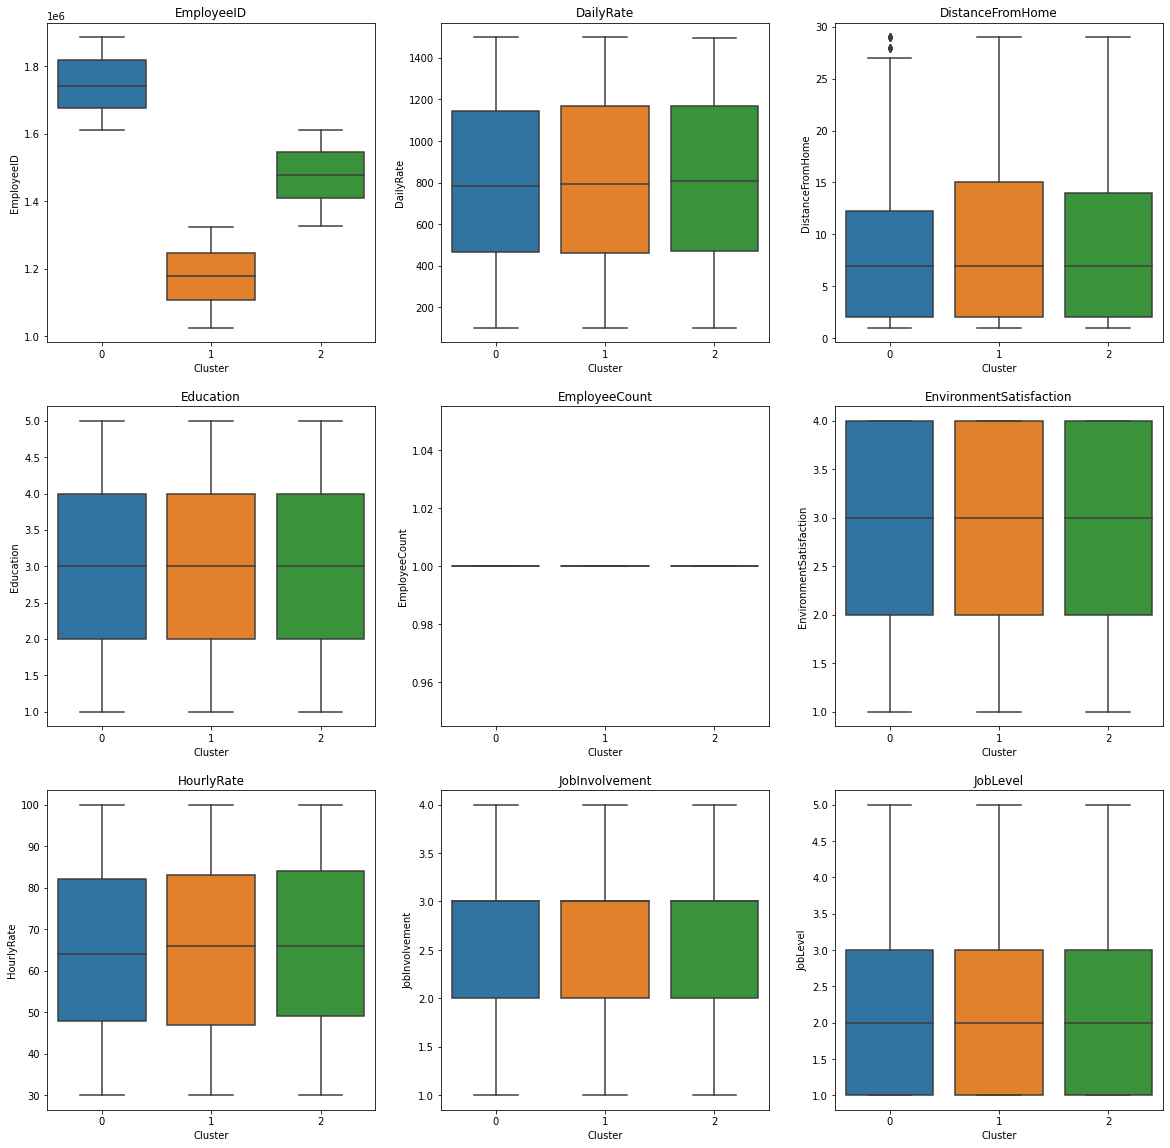

In [20]:
l=['EmployeeID', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount','EnvironmentSatisfaction',
   'HourlyRate','JobInvolvement','JobLevel']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data.Cluster,data[l[i]])
    plt.title(l[i])

## **METODE ELBOW**

In [25]:
cluster_range = range(1,10)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

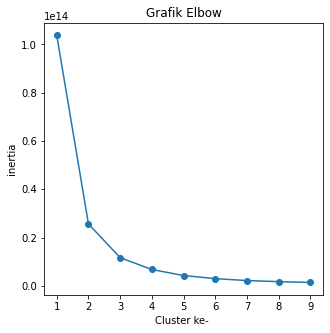

In [26]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.title('Grafik Elbow')
plt.xlabel("Cluster ke- ")
plt.ylabel('inertia')
plt.show()